In [13]:
# -*- coding: utf-8 -*-
"""
Created on Fri Sep 24 09:59:55 2021

@author: chint
"""

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import AdaBoostClassifier,RandomForestClassifier
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score,GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn import tree
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score, roc_curve,accuracy_score
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.svm import SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn import linear_model
from sklearn.model_selection import KFold,cross_val_score,GridSearchCV
import warnings
warnings.filterwarnings('ignore')

#%%

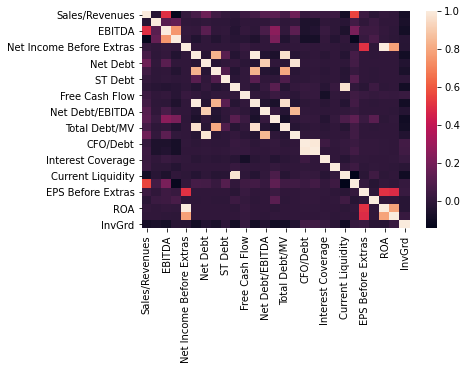

mean of cross validation scores= -0.006210709834376715 for alpha= 1000
mean of cross validation scores= -0.004602347948233498 for alpha= 100
mean of cross validation scores= -0.0014917682119959252 for alpha= 10
mean of cross validation scores= -0.0037446512778616103 for alpha= 1
mean of cross validation scores= -0.002333601167570143 for alpha= 0.1
mean of cross validation scores= -0.011275245034311654 for alpha= 0.01
mean of cross validation scores= -0.02649526378476355 for alpha= 0.001
mean of cross validation scores= -1.1782407282820273 for alpha= 0.0001


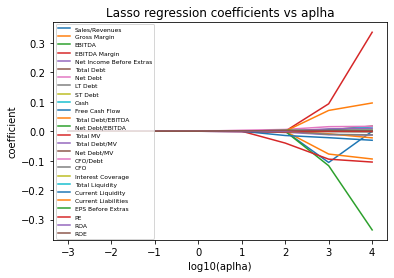

In [14]:
df=pd.read_csv('D:/UIUC_courses/IE517/project/MLF_GP1_CreditScore.csv')

pd_corr=df.corr()
sns.heatmap(pd_corr)
plt.show()
labels=df.keys()
# corr_labels=['Rating','CFO','CFO/Debt','ROE','Free Cash Flow', 'Current Liabilities','Cash','Current Liquidity']
# sns.heatmap(df[corr_labels].corr())
# plt.show()
# print("As we see from the above correleation plots, there is strong correlation between few of the features")


df2=df.values
X=df2[:,:-2]
y=df2[:,-2]
y=y.astype(np.float)
#%% Feature selection
score_y=[]
score_x=[]
for i in range(-3,5):

    lasso=linear_model.Lasso(alpha=10**-i)
    X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,random_state=42)
    pipe = Pipeline([('scaler',StandardScaler()), ('estimator', lasso)])
    #gs_cv=GridSearchCV(pipe,{},cv=3)
    #gs_cv.fit(X,y)
    print("mean of cross validation scores=",str(np.mean(cross_val_score(pipe,X,y,cv=KFold(n_splits=4, shuffle=True)))),"for alpha=",str(10**-i))
    lasso.fit(X_train,y_train)
    score_y.append(lasso.coef_)
    score_x.append(i)
   

plt.plot(np.transpose(score_x),np.array(score_y))
plt.legend(labels.values,loc='center left',fontsize=6)
plt.title("Lasso regression coefficients vs aplha")
plt.xlabel("log10(aplha)")
plt.ylabel("coefficient")
plt.show()
score_y=np.transpose(score_y)

we don't use LDA here because this is a binary class problem and will have only one LDA component


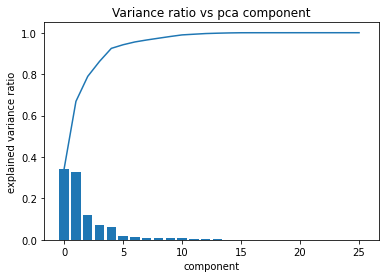

 From the graph, it is evident that 8-10 components of LDA capture 90% of variance


In [15]:
#%%  Feature extraction

print("we don't use LDA here because this is a binary class problem and will have only one LDA component")
pca_test=PCA()
pca_test.fit(X)
plt.bar(range(0,len(pca_test.explained_variance_ratio_)),pca_test.explained_variance_ratio_)
plt.plot(np.cumsum(pca_test.explained_variance_ratio_))
plt.xlabel('component')
plt.ylabel('explained variance ratio')
plt.title('Variance ratio vs pca component')
plt.show()
print(" From the graph, it is evident that 8-10 components of LDA capture 90% of variance")

In [16]:
#%% BASIC MODELS

#%% SVC


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y)
cv=StratifiedKFold(n_splits=10)
pipe = Pipeline([('scaler', StandardScaler()),('pca',PCA()), ('clf', SVC() )])
params={'clf__gamma':[0.001,0.1,1,10,50,100],'pca__n_components':[7,8,9,10,11,12]}
clf=GridSearchCV(pipe,params,cv=cv)
clf.fit(X_train, y_train)

print('best parameters for svc in original classification=',str(clf.best_params_))
print('best score for svc in original classification=',str(clf.best_score_))
y_predict=clf.best_estimator_.predict(X_test)

best parameters for svc in original classification= {'clf__gamma': 1, 'pca__n_components': 12}
best score for svc in original classification= 0.7857142857142857


In [17]:
    
#%% KNN

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y)
cv=StratifiedKFold(n_splits=10)
pipe = Pipeline([('scaler', StandardScaler()),('pca',PCA()), ('clf', KNN() )])
params={'clf__n_neighbors':[1,3,5,7,9,12],'pca__n_components':[7,8,9,10,11,12]}
clf=GridSearchCV(pipe,params,cv=cv)
clf.fit(X_train, y_train)

print('best parameters for KNN in original classification=',str(clf.best_params_))
print('best score for KNN in original classification=',str(clf.best_score_))
y_predict=clf.best_estimator_.predict(X_test)

best parameters for KNN in original classification= {'clf__n_neighbors': 1, 'pca__n_components': 12}
best score for KNN in original classification= 0.8058823529411765


In [18]:
#%% Decision Tree Classifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y)
cv=StratifiedKFold(n_splits=10)
pipe = Pipeline([('scaler', StandardScaler()),('pca',PCA()), ('clf', tree.DecisionTreeClassifier() )])
params={'clf__max_depth':[1,3,5,7,9,12],'pca__n_components':[7,8,9,10,11,12]}
clf=GridSearchCV(pipe,params,cv=cv)
clf.fit(X_train, y_train)
print('best parameters for decision tree in original classification=',str(clf.best_params_))
print('best score for decision tree in original classification=',str(clf.best_score_))
y_predict=clf.best_estimator_.predict(X_test)

best parameters for decision tree in original classification= {'clf__max_depth': 3, 'pca__n_components': 7}
best score for decision tree in original classification= 0.7613445378151261


In [19]:
#%% ENSEMBLING

#%% Adaboost Classifier

abc = AdaBoostClassifier(base_estimator=tree.DecisionTreeClassifier(max_depth=12) , n_estimators=100, random_state=0)

clf2 = Pipeline([('scaler', StandardScaler()),('pca',PCA(n_components=8)), ('clf', abc )])
clf2=GridSearchCV(abc,{},cv=cv)
clf2.fit(X_train, y_train)
print('best parameters for adaboost in original classification=',str(clf.best_params_))
print('best score for adaboost in original classification=',str(clf2.best_score_))
y_predict=clf2.best_estimator_.predict(X_test)

best parameters for adaboost in original classification= {'clf__max_depth': 3, 'pca__n_components': 7}
best score for adaboost in original classification= 0.8722689075630253


In [20]:
#%% Random Forest Classifier

abc = RandomForestClassifier(max_depth=12, n_estimators=100)

clf2 = Pipeline([('scaler', StandardScaler()),('pca',PCA(n_components=8)), ('clf', abc )])
clf2=GridSearchCV(abc,{},cv=cv)
clf2.fit(X_train, y_train)
print('best parameters for Random Forest Classifier in original classification=',str(clf.best_params_))
print('best score for Random Forest Classifier in original classification=',str(clf2.best_score_))
y_predict=clf2.best_estimator_.predict(X_test)

best parameters for Random Forest Classifier in original classification= {'clf__max_depth': 3, 'pca__n_components': 7}
best score for Random Forest Classifier in original classification= 0.86218487394958


In [21]:
#%% Results



print("Since random forest seems tpo perform the best among all the models tested, the accuracies are computed based on RF model")
print('f1 score:',str(f1_score(y_predict,y_test)))
print('precision score',str(precision_score(y_predict,y_test)))
print('recall score',str(recall_score(y_predict,y_test)))
print(confusion_matrix(y_test,y_predict))

Since random forest seems tpo perform the best among all the models tested, the accuracies are computed based on RF model
f1 score: 0.9131513647642681
precision score 0.9533678756476683
recall score 0.8761904761904762
[[ 72  52]
 [ 18 368]]


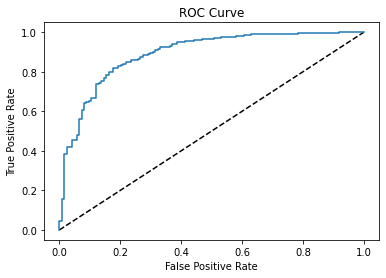

In [22]:
#%% ROC Curve

y_pred_prob =clf2.predict_proba(X_test)[:,1]
fpr, tpr, thresholds =roc_curve(y_test, y_pred_prob)
# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()